In [35]:
#import libraries 
import matplotlib.pyplot as plt
import imageio
import math
import os
import cv2
import numpy as np
from skimage import io, color
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from google.colab.patches import cv2_imshow
from matplotlib.pyplot import figure

2) a.

In [36]:
# implementing hadamard matrix
def get_hadamard_matrix(n):
  if n==1:
    return np.array([[1,1],[1,-1]], dtype=float)/math.sqrt(2)
  hadamard = np.zeros((2**n,2**n),dtype=float)
  hadamard_sub = get_hadamard_matrix(n-1)
  hadamard[0:2**(n-1),0:2**(n-1)]=hadamard_sub
  hadamard[2**(n-1):2**(n),0:2**(n-1)]=hadamard_sub
  hadamard[0:2**(n-1),2**(n-1):2**(n)]=hadamard_sub
  hadamard[2**(n-1):2**(n),2**(n-1):2**(n)]=-hadamard_sub
  return hadamard/math.sqrt(2)

2) b.

In [37]:
#2.b implement the standard basis
def get_standard_matrix(n):
  standard_basis=np.eye(round(2**n))
  return standard_basis*math.sqrt(2**n)

bases=[]
for i in range(2,7):
  bases.append(get_hadamard_matrix(i) @ get_standard_matrix(i))

def plot_signals(bases, n):
  cols=4
  rows=int(np.ceil(2**n/cols))
  plt.figure(figsize=(15,4*rows))
  x=np.arange(start=0,stop=1+1/(2**n),step=1/(2**n))

  for i in range(2**n):
    plt.subplot(rows,cols,i+1)
    y=np.concatenate(([bases[i][0]],bases[i]))
    plt.step(x, y, where='pre')
  plt.tight_layout()

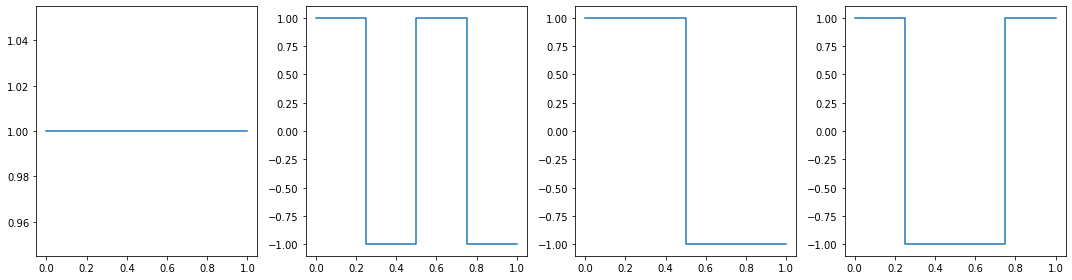

In [38]:
plot_signals(bases[0],2)

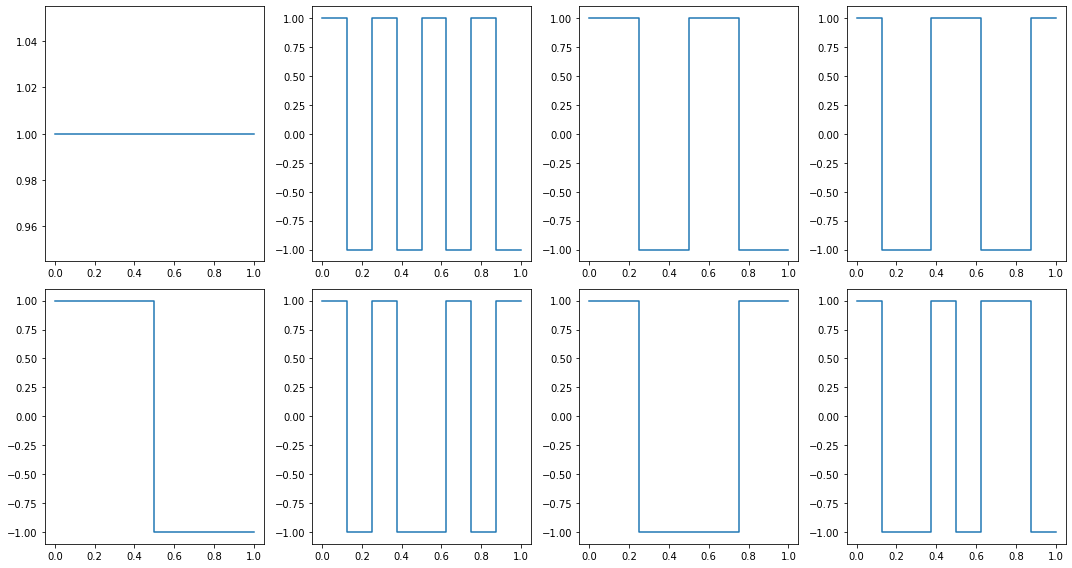

In [39]:
plot_signals(bases[1],3)

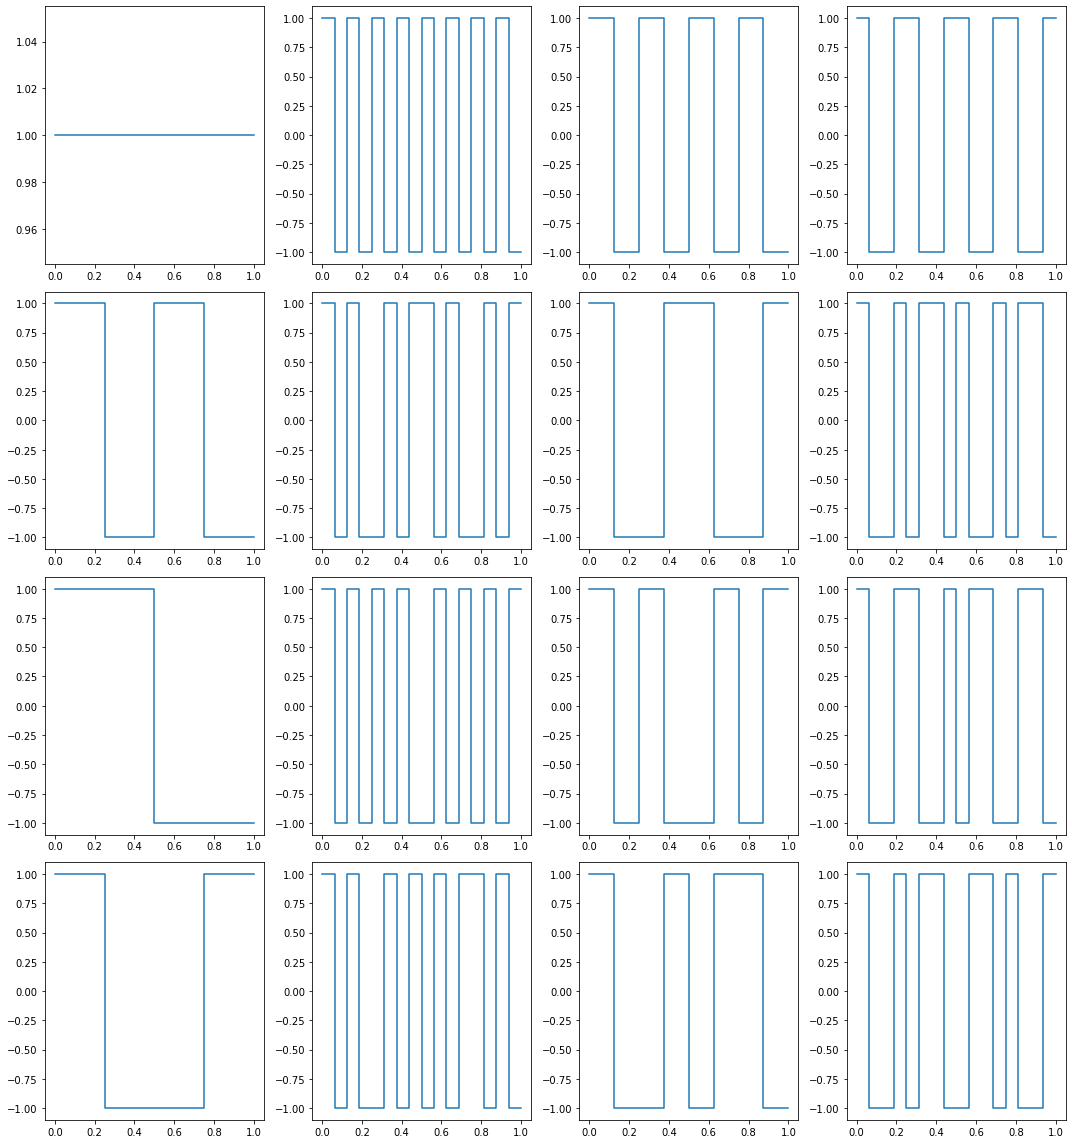

In [40]:
plot_signals(bases[2],4)

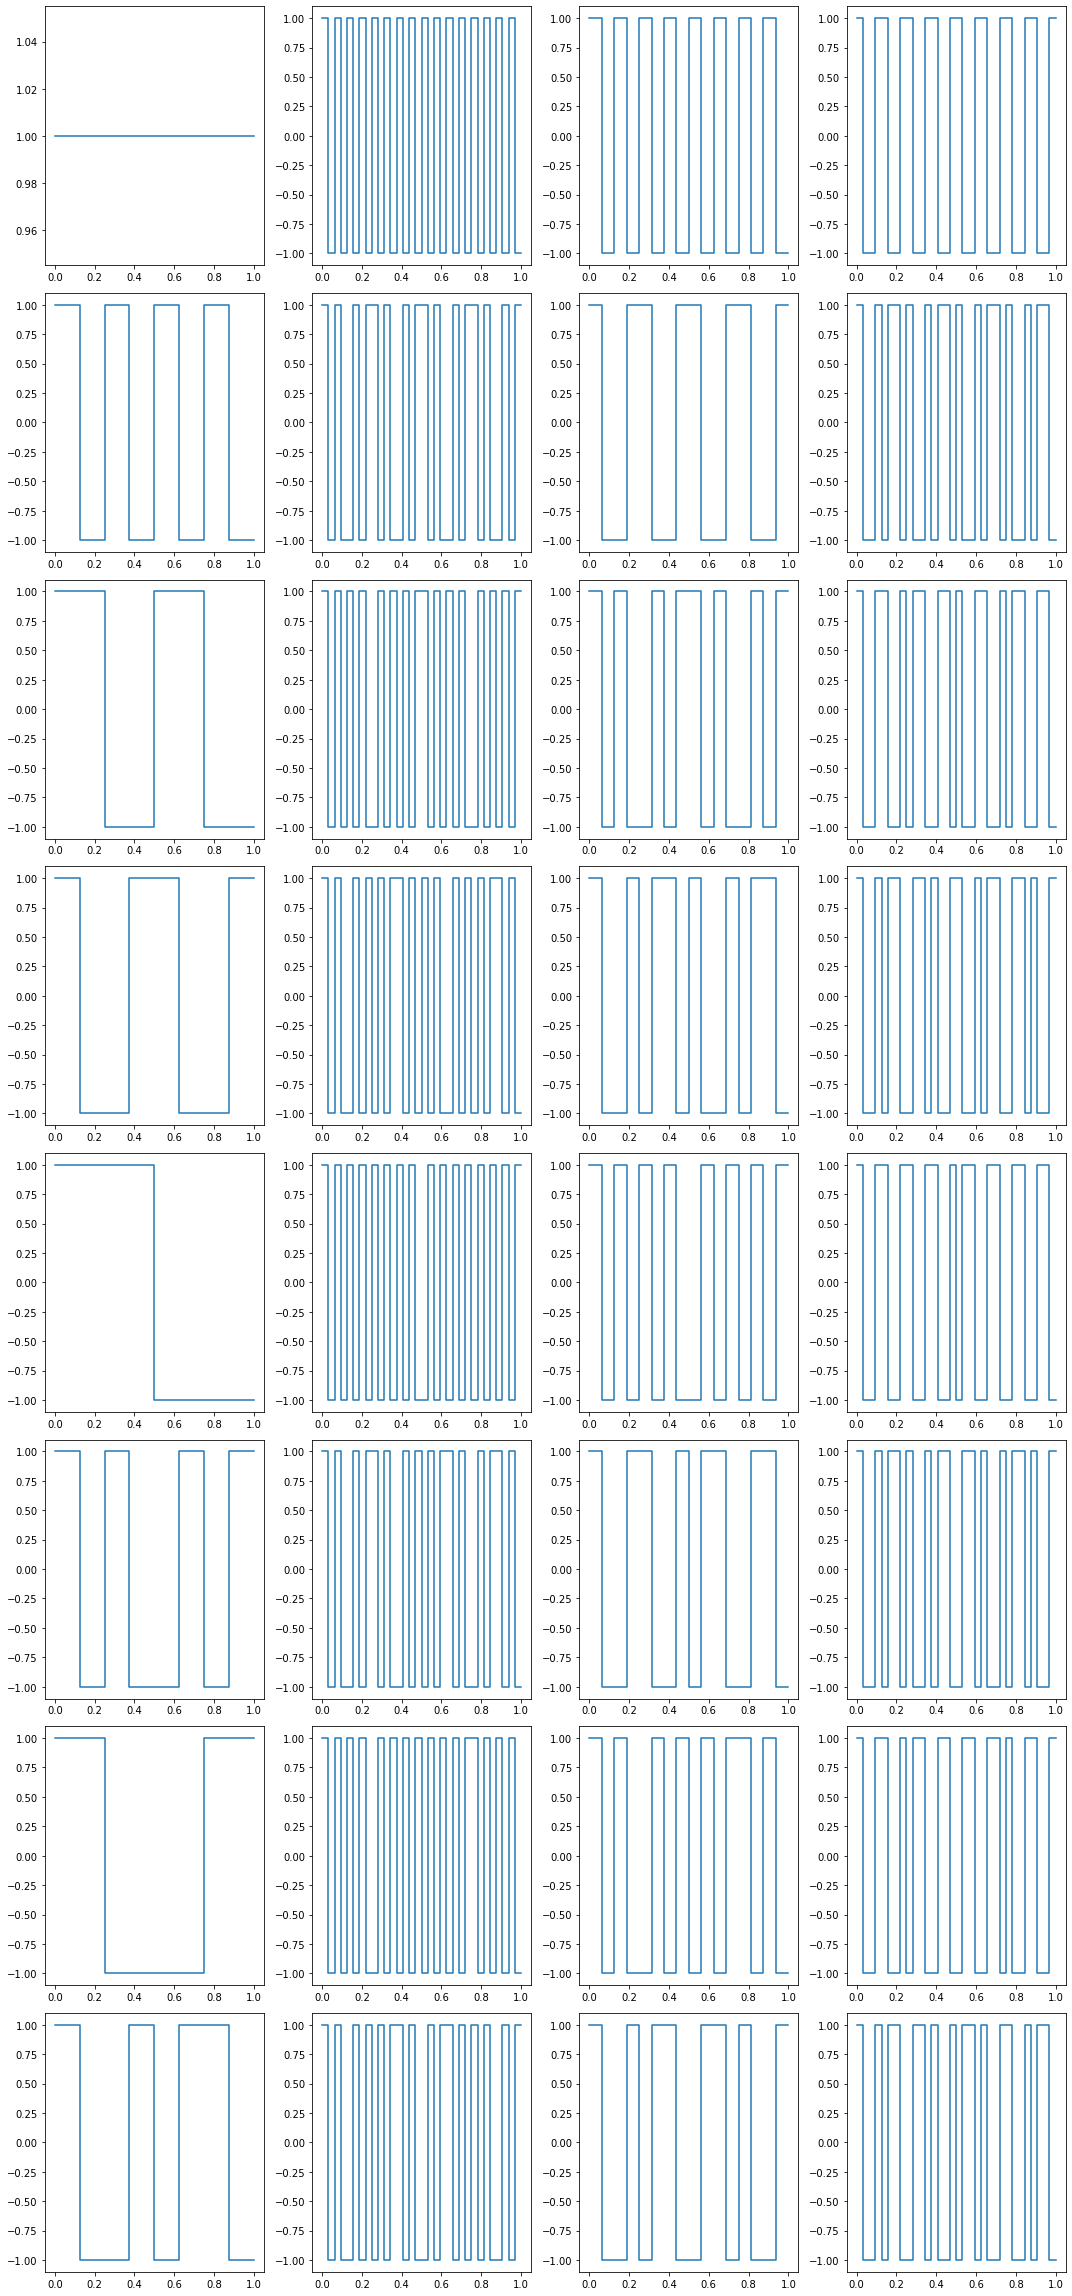

In [41]:
plot_signals(bases[3],5)

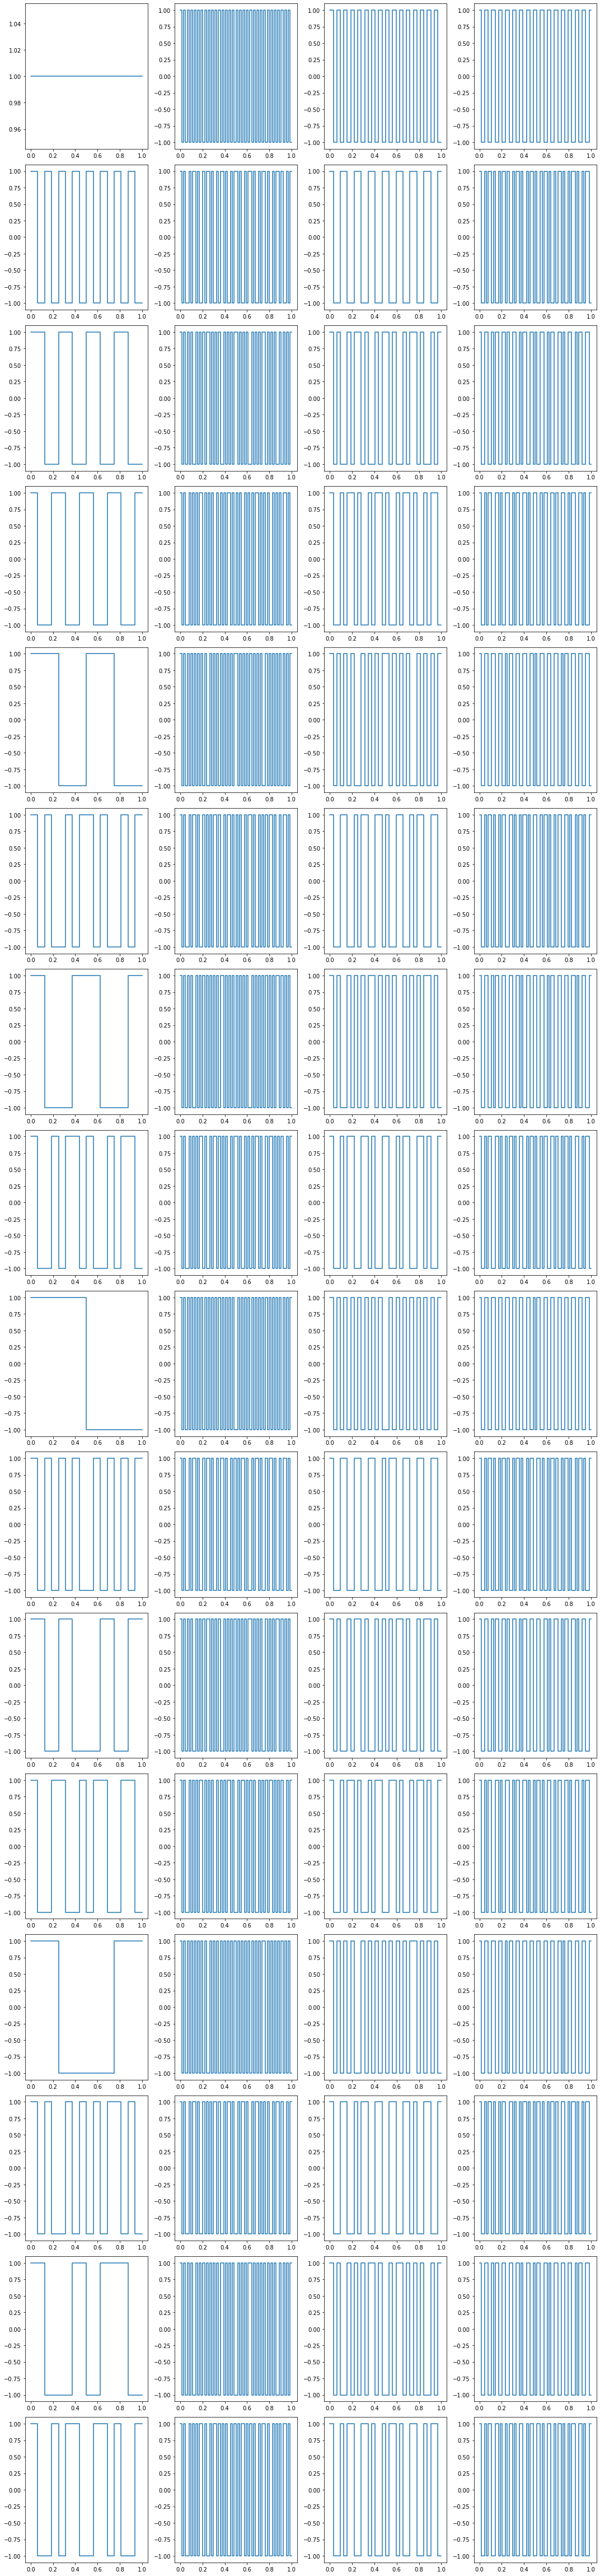

In [42]:
plot_signals(bases[4],6)

2) c.

In [43]:
# implement walsh hadamard
def count_changes(row, N):
  count=0
  for i in range(N-1):
    if row[i] != row[i+1]:
      count+=1
  return count

In [44]:
def get_walsh_hadamard_matrix(hadamard):
  N=hadamard.shape[0]
  permute=np.zeros((N,N))
  for i in range(N):
    c=count_changes(hadamard[i],N)
    permute[c,i]=1
  return permute@hadamard

2) d.

In [45]:
# plot the walsh hadamard bases
bases=[]
for i in range(2,7):
  bases.append(get_walsh_hadamard_matrix(get_hadamard_matrix(i))@get_standard_matrix(i))

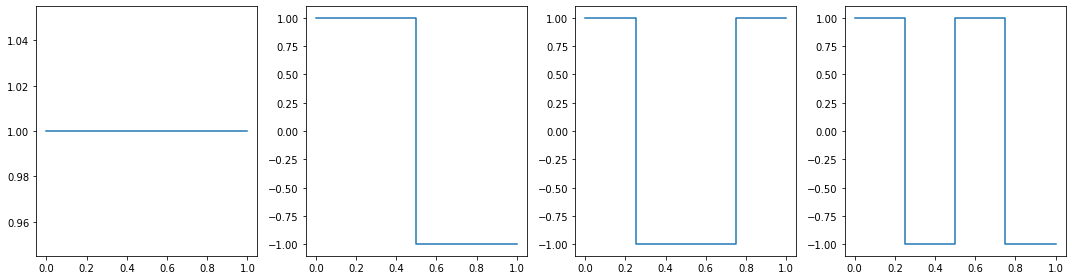

In [46]:
plot_signals(bases[0],2)

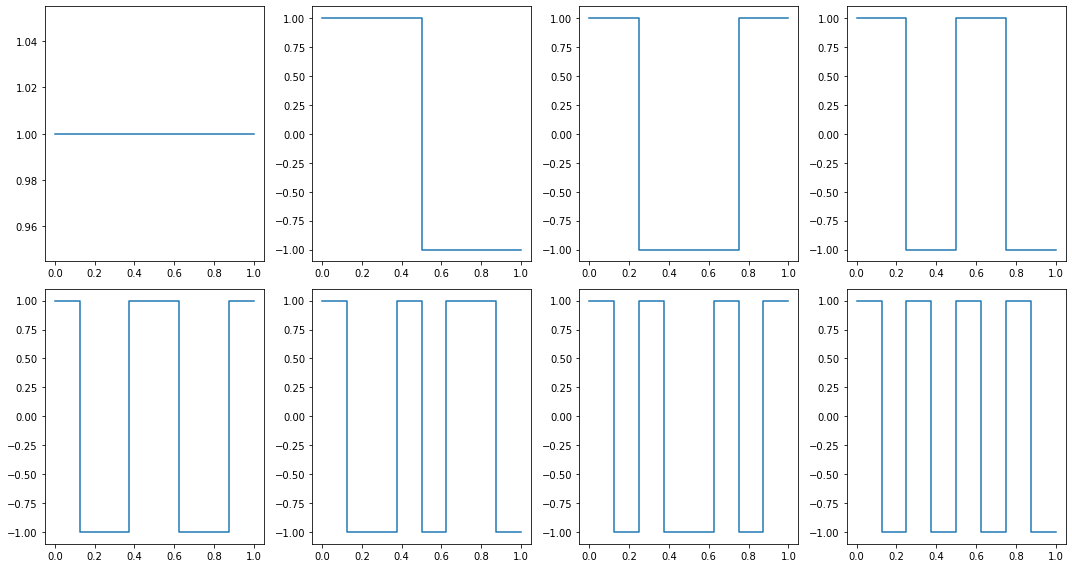

In [47]:
plot_signals(bases[1],3)

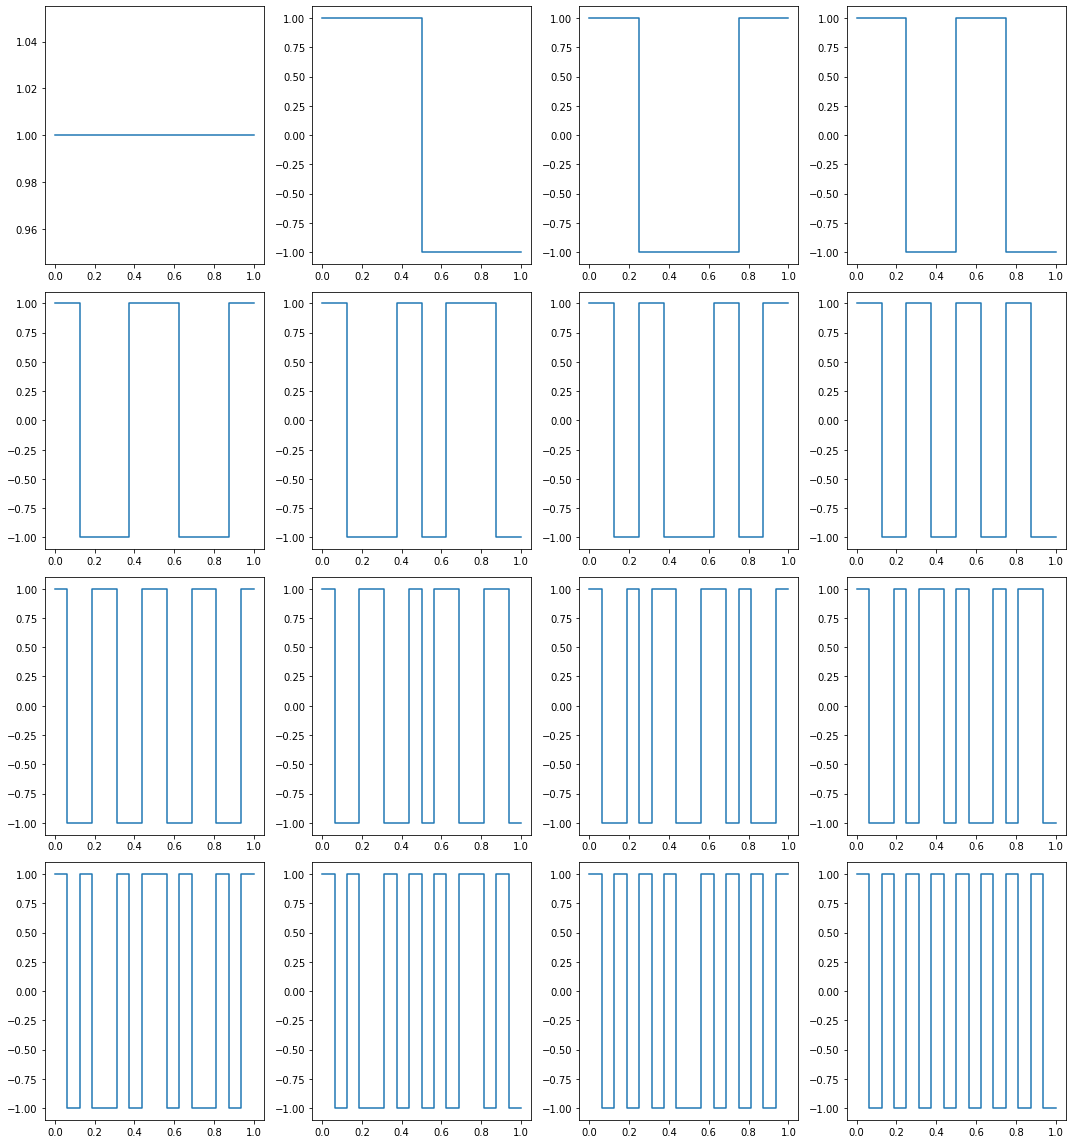

In [48]:
plot_signals(bases[2],4)

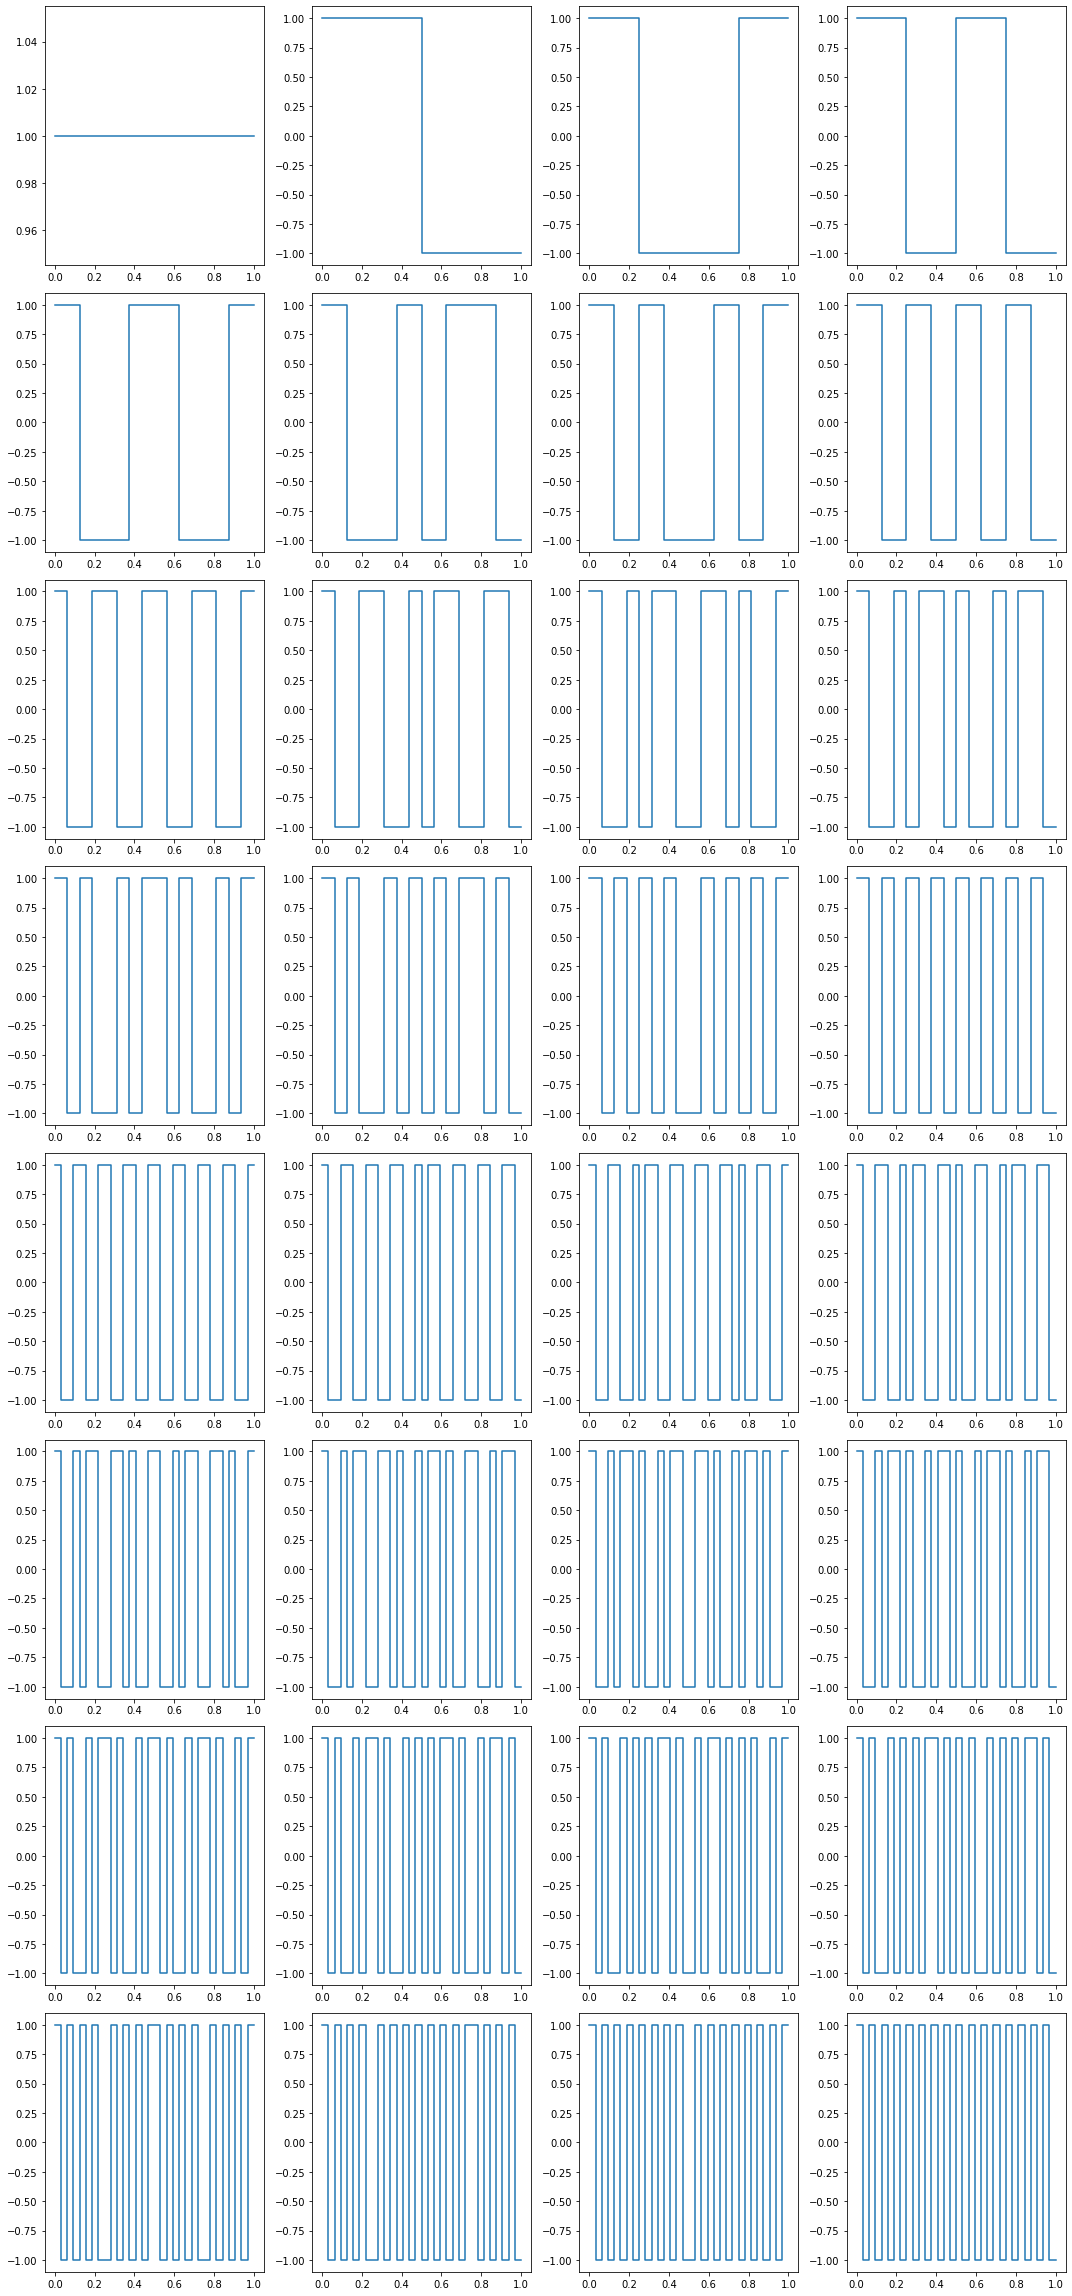

In [49]:
plot_signals(bases[3],5)

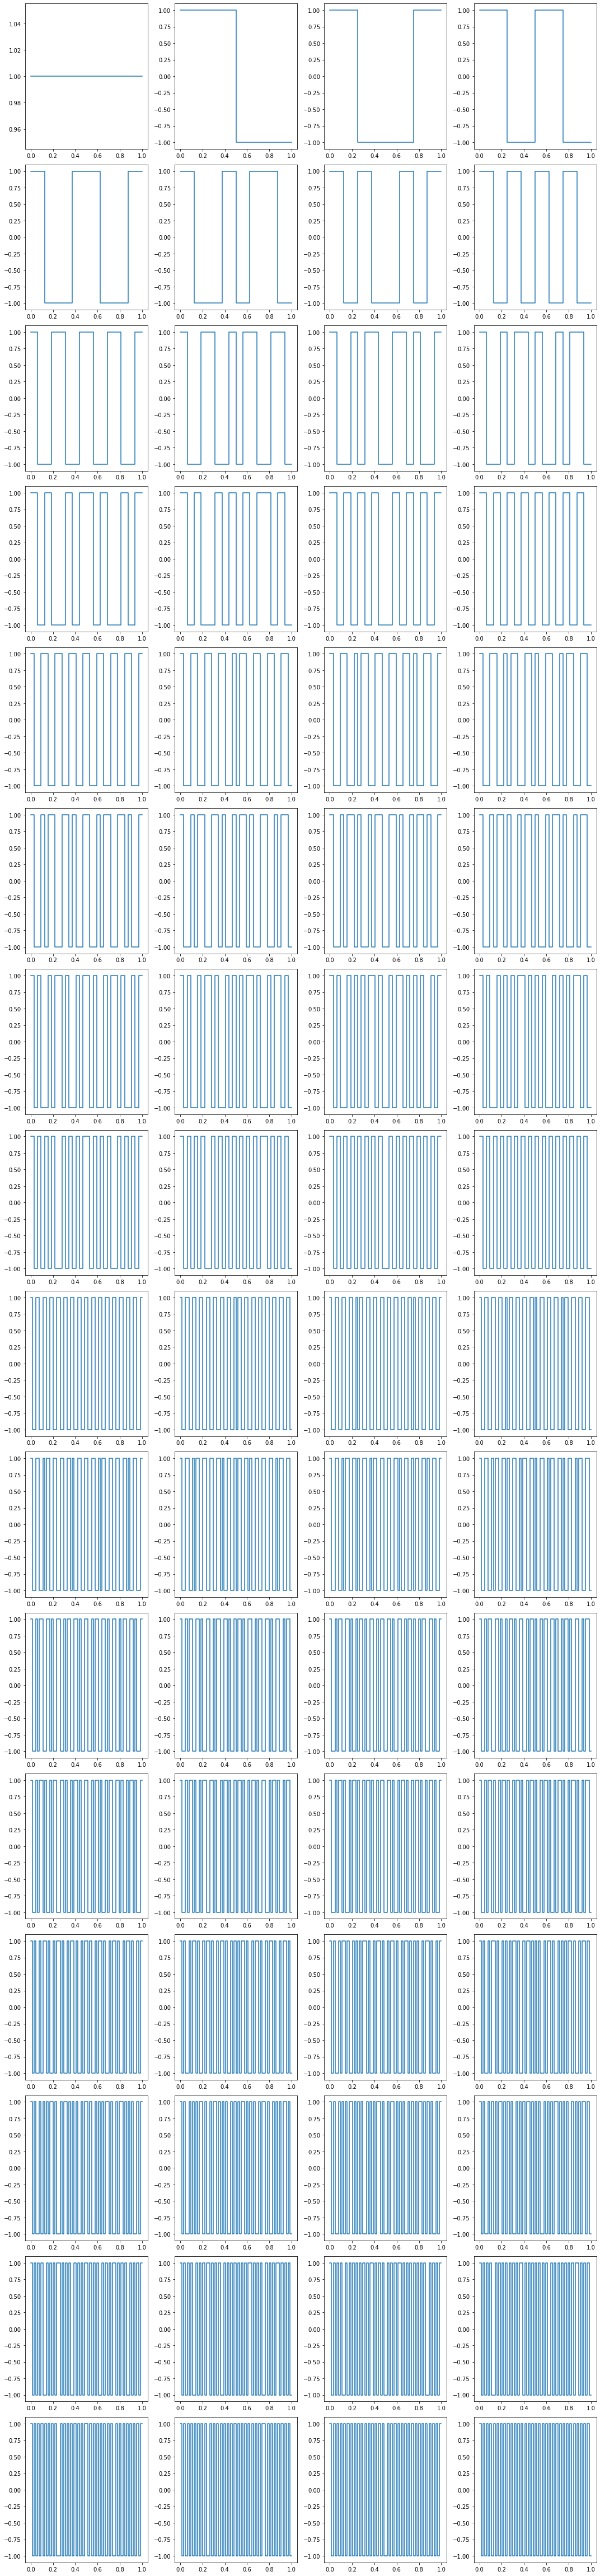

In [50]:
plot_signals(bases[4],6)

2) e.

In [51]:
# implement haar
def get_haar_matrix(n):
  if n==1:
    return get_hadamard_matrix(n)
  sub_haar=get_haar_matrix(n-1)
  eye=np.eye(2**(n-1))
  left_op=np.zeros((2,1))
  left_op[0,0]=1
  left_op[1,0]=1
  right_op=np.zeros((2,1))
  right_op[0,0]=1
  right_op[1,0]=-1
  left_half=np.kron(sub_haar,left_op)
  right_half=np.kron(eye,right_op)
  res=np.c_[left_half,right_half]
  return res/math.sqrt(2)

2) f.

In [52]:
#2.f plot the haar bases
bases=[]
for i in range(2,7):
  bases.append(np.transpose(get_haar_matrix(i))@get_standard_matrix(i))

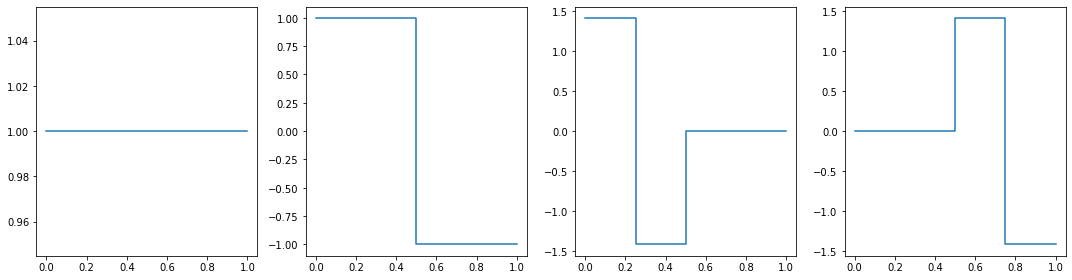

In [53]:
i=0
plot_signals(bases[i],i+2)
i+=1

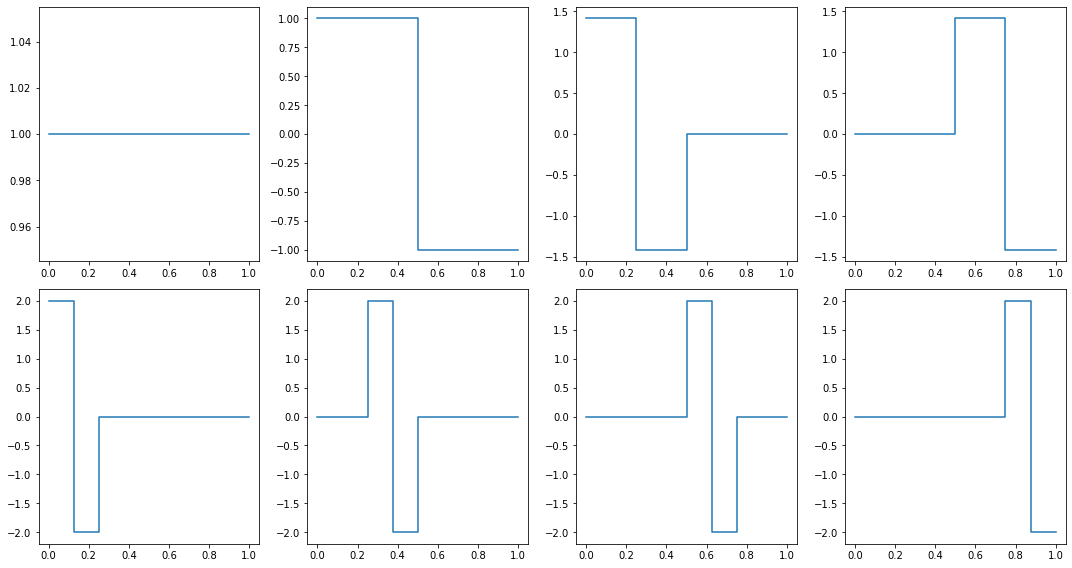

In [54]:
plot_signals(bases[i],i+2)
i+=1

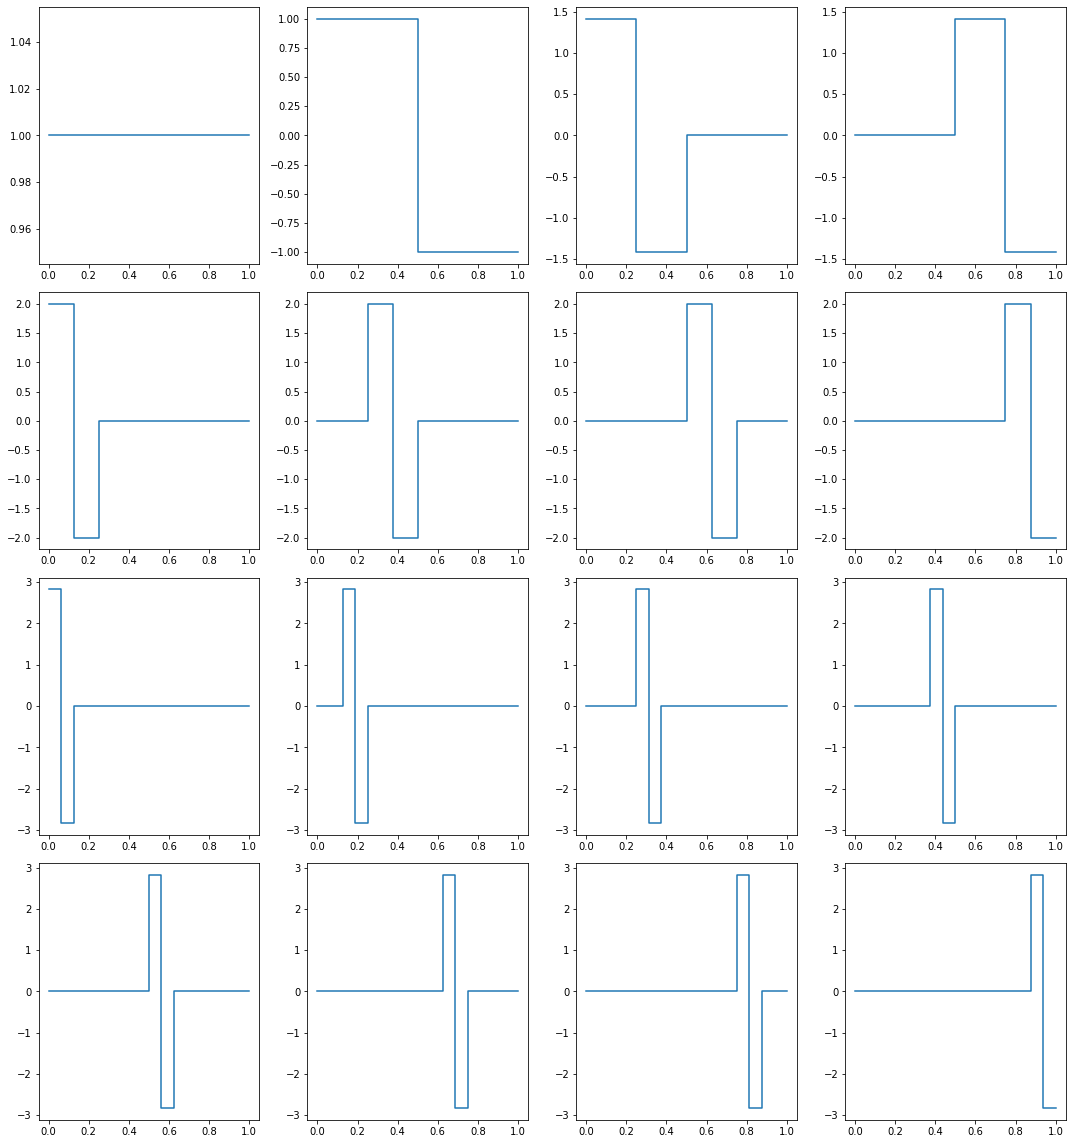

In [55]:
plot_signals(bases[i],i+2)
i+=1

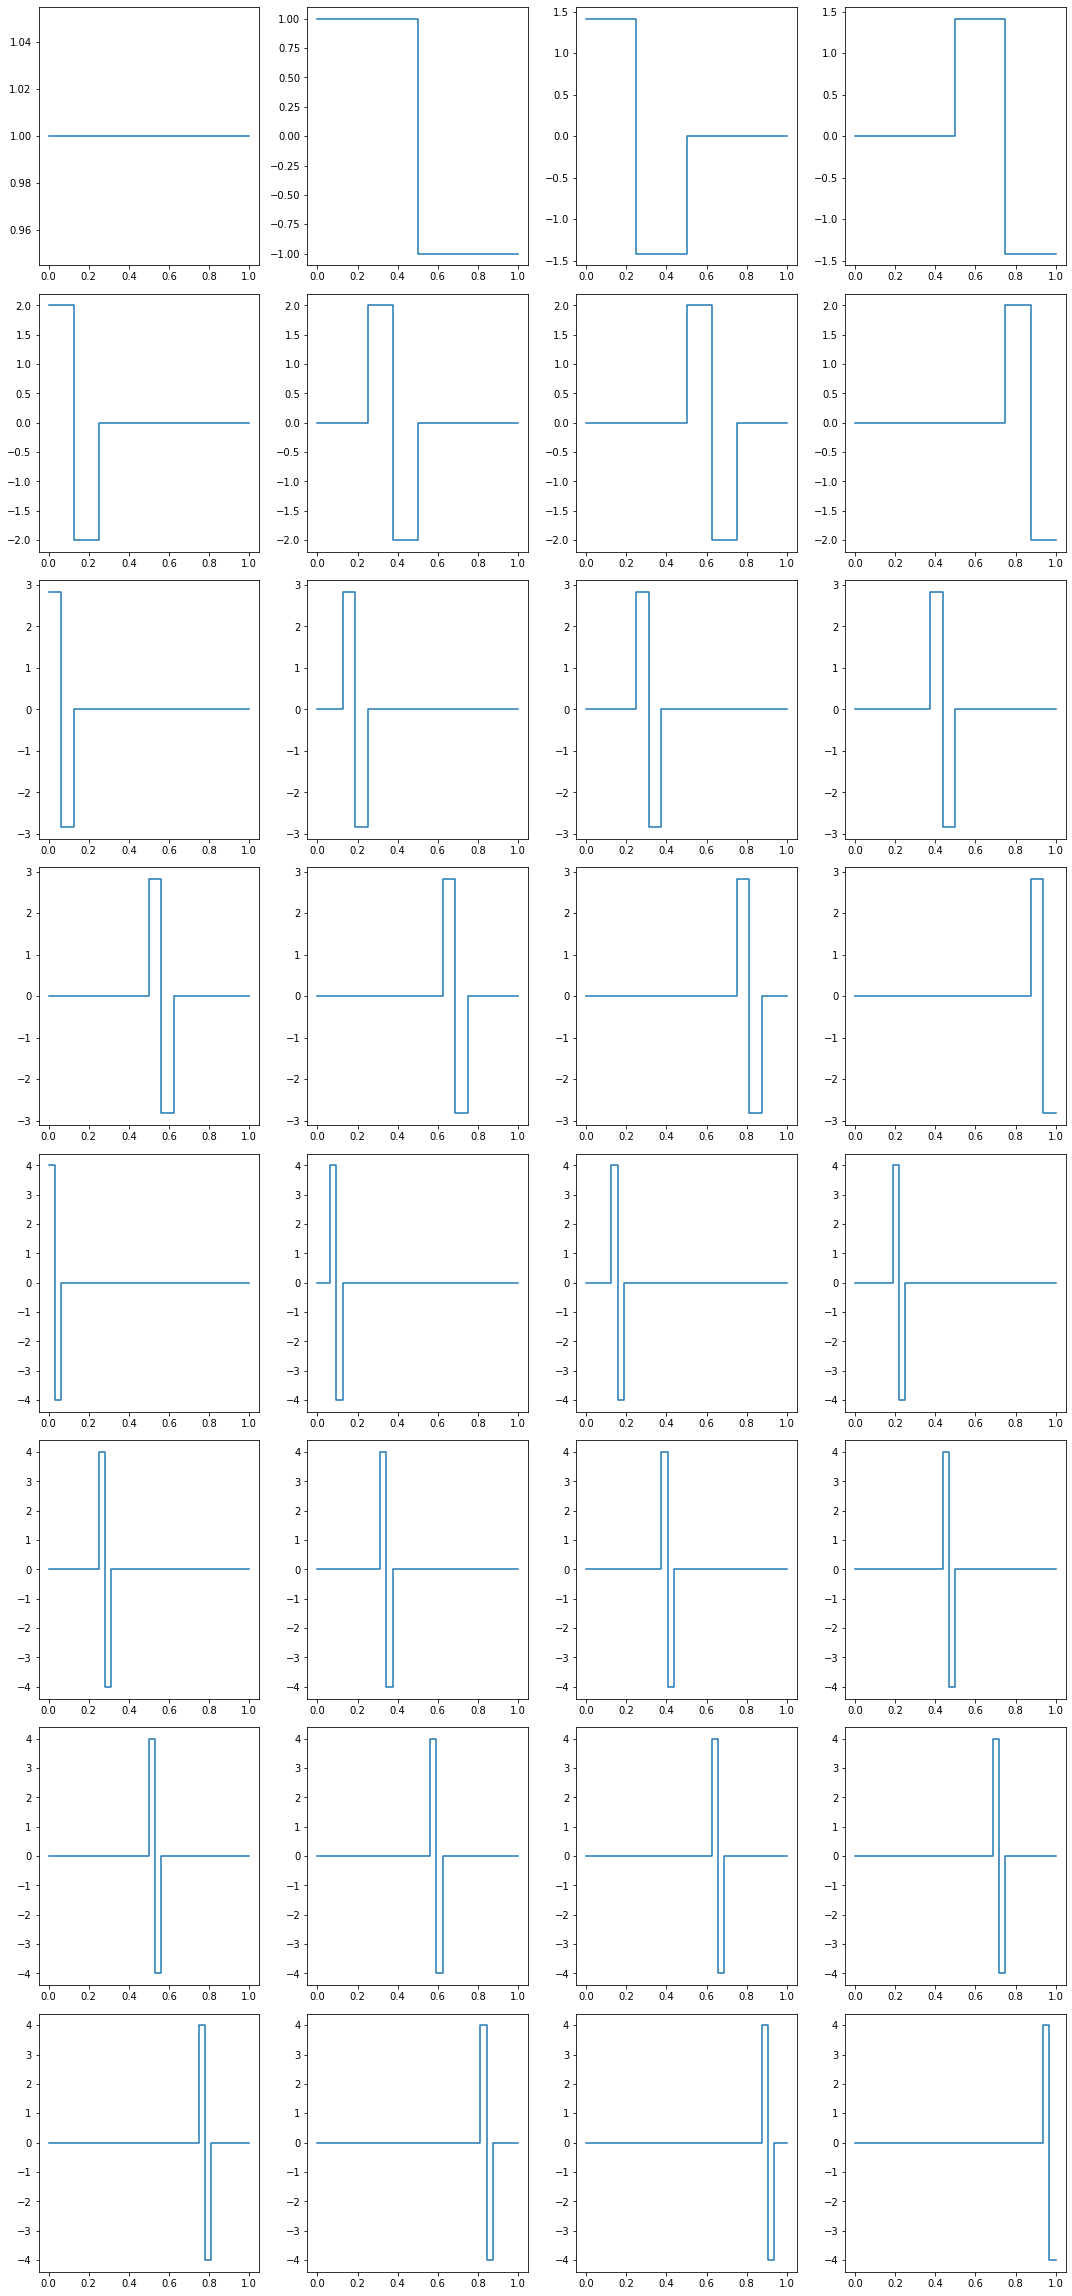

In [56]:
plot_signals(bases[i],i+2)
i+=1

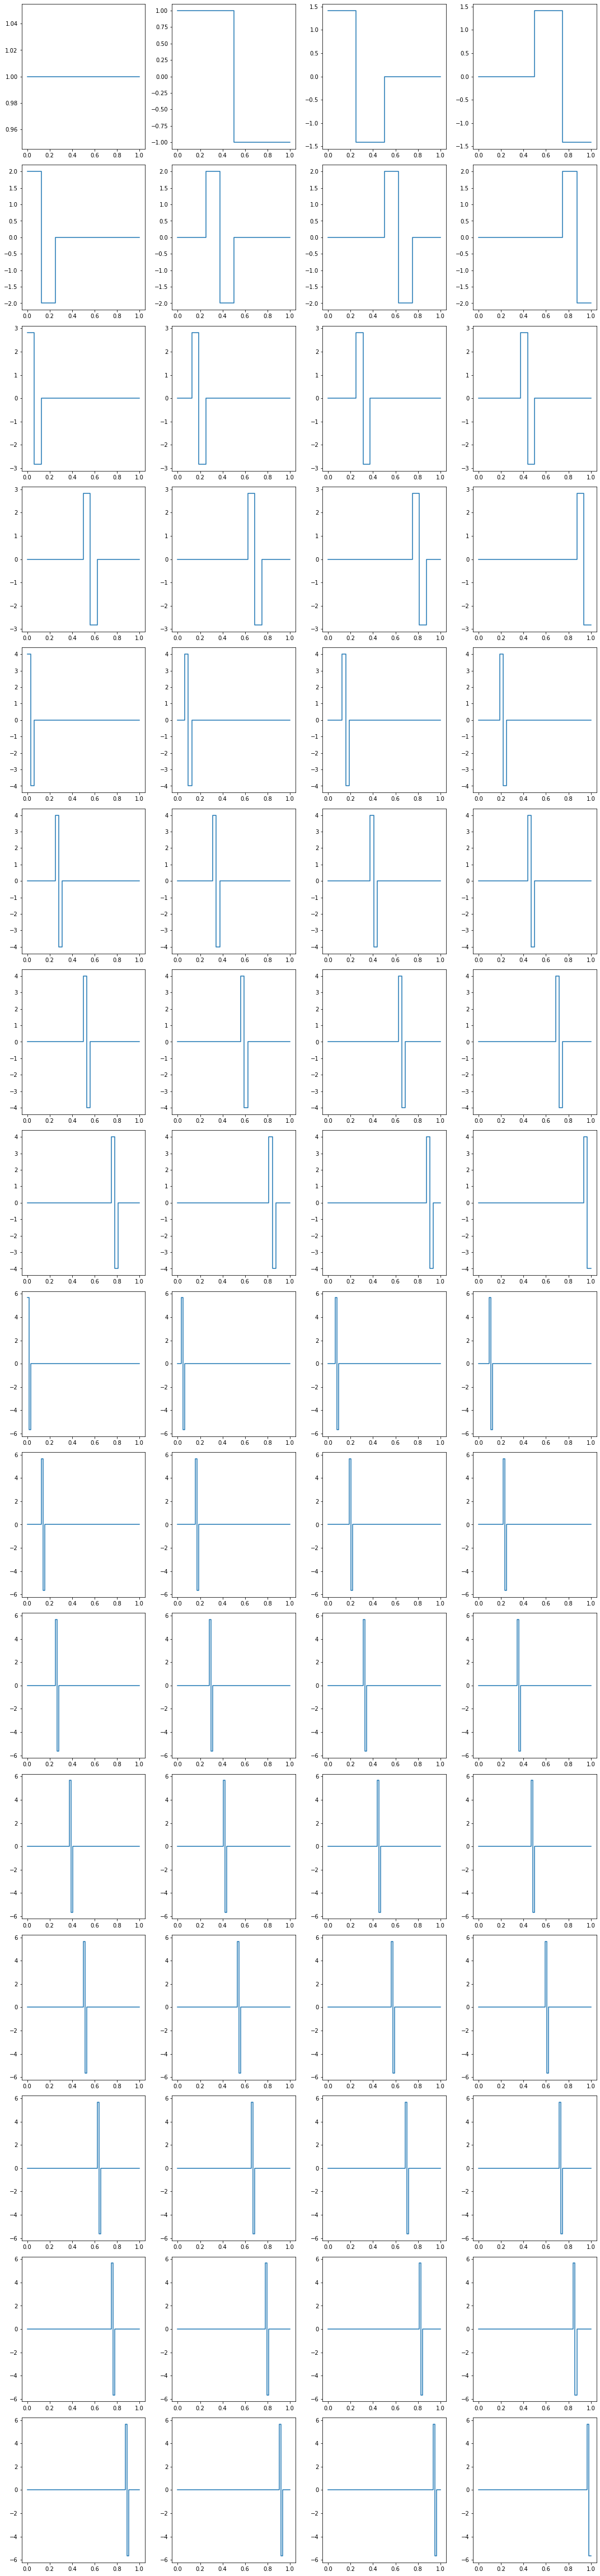

In [57]:
plot_signals(bases[i],i+2)

2) g.

In [58]:
def func(x):
  return x*math.exp(x)
x_func=np.linspace(-4,5,50)
y_func=x_func*np.power(math.exp(1),x_func)

standard=get_standard_matrix(2)/3
haar=np.transpose(get_haar_matrix(2))@standard
walsh_hadamard=get_walsh_hadamard_matrix(get_walsh_hadamard_matrix(get_hadamard_matrix(2)))@standard
x=np.arange(start=-4,stop=5+9/4,step=9/4)

haar_coeff=np.zeros(4)
haar_coeff[0]=(1/3)*(4*math.exp(5)+5*math.exp(-4))
haar_coeff[1]=(1/3)*(4*math.exp(5)+math.exp(0.5)-5*math.exp(-4))
haar_coeff[2]=(math.sqrt(2)/3)*(-2*2.75*math.exp(-1.75)+(1/2)*math.exp(1/2)+5*math.exp(-4))
haar_coeff[3]=(math.sqrt(2)/3)*(2*1.75*math.exp(2.75)-4*math.exp(5)+(1/2)*math.exp(1/2))
walsh_coeff=np.zeros(4)
walsh_coeff[0]=haar_coeff[0]
walsh_coeff[1]=haar_coeff[1]
walsh_coeff[2]=(1/3)*(4*math.exp(5)-5*math.exp(-4))-(2/3)*(2.75*math.exp(-1.75)+1.75*math.exp(2.75))
walsh_coeff[3]=(-1/3)*(4*math.exp(5)+5*math.exp(-4))+(2/3)*(-2.75*math.exp(-1.75)+(1/2)*math.exp(1/2)+1.75*math.exp(2.75))

for i in range(4):
  haar[i,:]*=haar_coeff[i]
  walsh_hadamard[i,:]*=walsh_coeff[i]

In [59]:
print(haar_coeff)

[ 1.97914738e+02  1.98403260e+02 -1.87703188e-02 -2.53652903e+02]


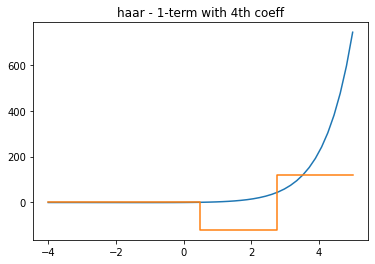

In [60]:
#plotting for haar
#1-term is with 4th coeff:
plt.title("haar - 1-term with 4th coeff")
plt.plot(x_func,y_func)
_=plt.step(x,np.concatenate(([haar[3,0]],haar[3,:])),where='pre')

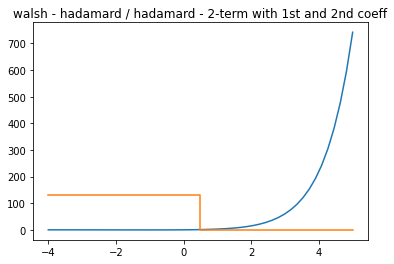

In [61]:
#2-term is with 1st and 2nd coeff
plt.title("walsh - hadamard / hadamard - 2-term with 1st and 2nd coeff")
plt.plot(x_func,y_func)
approx=walsh_hadamard[0,:]+walsh_hadamard[1,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')

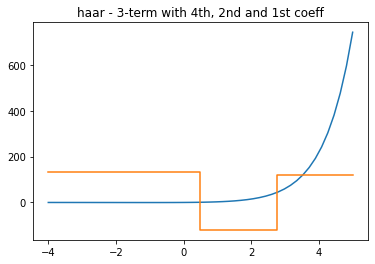

In [62]:
#3-term is with 4th, 2nd and 1st coeff
plt.title("haar - 3-term with 4th, 2nd and 1st coeff")
plt.plot(x_func,y_func)
approx=haar[3,:]+haar[1,:]+haar[0,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')

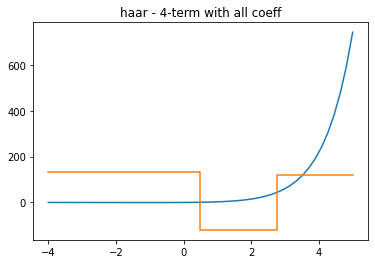

In [63]:
#4-term is with all coeff
plt.title("haar - 4-term with all coeff")
plt.plot(x_func,y_func)
approx=haar[3,:]+haar[1,:]+haar[0,:]+haar[2,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')

In [64]:
print(walsh_coeff)

[ 197.9147382   198.40325983  179.28536331 -179.43401281]


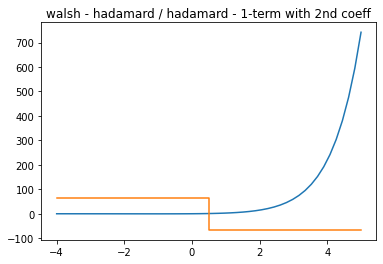

In [65]:
#plotting for walsh-hadamard/hadamard
#1-term is with 2nd coeff:
plt.title("walsh - hadamard / hadamard - 1-term with 2nd coeff")
plt.plot(x_func,y_func)
_=plt.step(x,np.concatenate(([walsh_hadamard[1,0]],walsh_hadamard[1,:])),where='pre')

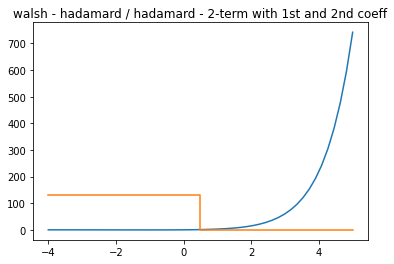

In [66]:
#2-term is with 1st and 2nd coeff
plt.title("walsh - hadamard / hadamard - 2-term with 1st and 2nd coeff")
plt.plot(x_func,y_func)
approx=walsh_hadamard[0,:]+walsh_hadamard[1,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')

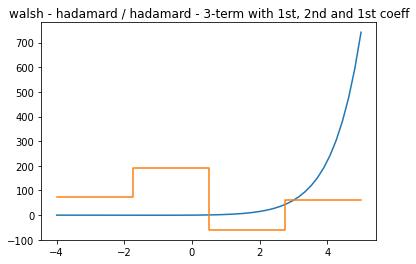

In [67]:
#3-term is with 4th, 2nd and 1st coeff
plt.title("walsh - hadamard / hadamard - 3-term with 1st, 2nd and 1st coeff")
plt.plot(x_func,y_func)
approx=walsh_hadamard[3,:]+walsh_hadamard[1,:]+walsh_hadamard[0,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')

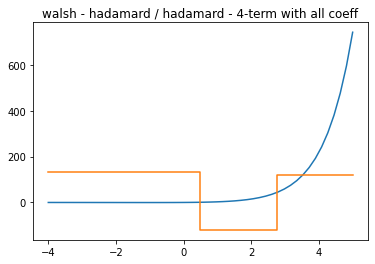

In [68]:
#4-term is with all coeff
plt.title("walsh - hadamard / hadamard - 4-term with all coeff")
plt.plot(x_func,y_func)
approx=walsh_hadamard[3,:]+walsh_hadamard[1,:]+walsh_hadamard[0,:]+walsh_hadamard[2,:]
_=plt.step(x,np.concatenate(([approx[0]],approx)),where='pre')